# the objective is to detect kaggle bots using the following dataset

firstly we clean the dataset,remove outliers and then build a suitable model to achieve highest accuracy in order to detect fake kaggle bots

In [58]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data=pd.read_csv('kaggle_bot_accounts.csv')

In [59]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas_profiling import ProfileReport

In [60]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [57]:
data.head()

Unnamed: 0                     NAME  GENDER                    EMAIL_ID  \
0           0        Johnny KerrThomas    Male     jacksonalan@example.com   
1           1        Dwayne LarsenLara    Male        calvin80@example.com   
2           2                      NaN    Male          qbrown@example.net   
3           3  Russell SimmonsPhillips    Male  kimberlywagner@example.com   
4           4     Jamie WilsonMartinez  Female     shaunbrooks@example.com   

  IS_GLOGIN  FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
0     False            53.0             87.0            5.0         3.0   
1      True            16.0             67.0            5.0         NaN   
2      True            44.0             81.0            4.0        17.0   
3      True            23.0            114.0            5.0        24.0   
4     False            46.0            112.0            2.0        12.0   

   DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN REGISTRATION_IPV4  \
0             124.0                   NaN      81.88.75.170   
1              26.0                 24.97               NaN   
2             125.0                  7.75   159.202.103.178   
3              67.0                 13.40     196.11.132.51   
4              63.0                 24.83    159.196.199.20   

  REGISTRATION_LOCATION  TOTAL_VOTES_GAVE_NB  TOTAL_VOTES_GAVE_DS  \
0             Argentina                 16.0                 10.0   
1           New Zealand                 14.0                  5.0   
2            Costa Rica                 16.0                  4.0   
3                 Italy                 21.0                 10.0   
4               Belgium                 10.0                  6.0   

   TOTAL_VOTES_GAVE_DC  ISBOT  
0                  3.0    NaN  
1                  2.0    NaN  
2                  0.0  False  
3                  1.0  False  
4                  2.0  False

In [5]:
data.shape

(1321188, 17)

this is a large dataset having 1321188 rows and 17 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321188 entries, 0 to 1321187
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1321188 non-null  int64  
 1   NAME                   1243024 non-null  object 
 2   GENDER                 1243309 non-null  object 
 3   EMAIL_ID               1243374 non-null  object 
 4   IS_GLOGIN              1243272 non-null  object 
 5   FOLLOWER_COUNT         1243476 non-null  float64
 6   FOLLOWING_COUNT        1242743 non-null  float64
 7   DATASET_COUNT          1242621 non-null  float64
 8   CODE_COUNT             1243262 non-null  float64
 9   DISCUSSION_COUNT       1243466 non-null  float64
 10  AVG_NB_READ_TIME_MIN   1242872 non-null  float64
 11  REGISTRATION_IPV4      1242859 non-null  object 
 12  REGISTRATION_LOCATION  1242898 non-null  object 
 13  TOTAL_VOTES_GAVE_NB    1243483 non-null  float64
 14  TOTAL_VOTES_GAVE_D

info gives the column names along with its datatypes

In [7]:
data.columns

Index(['Unnamed: 0', 'NAME', 'GENDER', 'EMAIL_ID', 'IS_GLOGIN',
       'FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'REGISTRATION_IPV4',
       'REGISTRATION_LOCATION', 'TOTAL_VOTES_GAVE_NB', 'TOTAL_VOTES_GAVE_DS',
       'TOTAL_VOTES_GAVE_DC', 'ISBOT'],
      dtype='object')

In [8]:
data.isnull().sum()

Unnamed: 0                   0
NAME                     78164
GENDER                   77879
EMAIL_ID                 77814
IS_GLOGIN                77916
FOLLOWER_COUNT           77712
FOLLOWING_COUNT          78445
DATASET_COUNT            78567
CODE_COUNT               77926
DISCUSSION_COUNT         77722
AVG_NB_READ_TIME_MIN     78316
REGISTRATION_IPV4        78329
REGISTRATION_LOCATION    78290
TOTAL_VOTES_GAVE_NB      77705
TOTAL_VOTES_GAVE_DS      77934
TOTAL_VOTES_GAVE_DC      78030
ISBOT                    78500
dtype: int64

In [9]:
# Displaying columns with missing values using sum and percentage
missing_values = data.isnull().sum().sort_values(ascending = True)
percent = ((data.isnull().sum()/data.isnull().count()) * 100) .sort_values(ascending=True)
missing_data = pd.concat([missing_values, percent], axis = 1, keys = ["Values", "Percentage"])
missing_data

Values  Percentage
Unnamed: 0                  0    0.000000
TOTAL_VOTES_GAVE_NB     77705    5.881449
FOLLOWER_COUNT          77712    5.881979
DISCUSSION_COUNT        77722    5.882736
EMAIL_ID                77814    5.889699
GENDER                  77879    5.894619
IS_GLOGIN               77916    5.897420
CODE_COUNT              77926    5.898176
TOTAL_VOTES_GAVE_DS     77934    5.898782
TOTAL_VOTES_GAVE_DC     78030    5.906048
NAME                    78164    5.916191
REGISTRATION_LOCATION   78290    5.925727
AVG_NB_READ_TIME_MIN    78316    5.927695
REGISTRATION_IPV4       78329    5.928679
FOLLOWING_COUNT         78445    5.937459
ISBOT                   78500    5.941622
DATASET_COUNT           78567    5.946693

This gives the percentage of the columns with respect to the null values which are irrelevant and likely bot acccounts

In [10]:
# Dealing with missing values
mean_total_votes = round(data["TOTAL_VOTES_GAVE_NB"].mean())
mean_follower_count = round(data["FOLLOWER_COUNT"].mean())
mean_discussion_count = round(data["DISCUSSION_COUNT"].mean())
mode_gender = data["GENDER"].mode()
mean_code_count = round(data["CODE_COUNT"].mean())
mean_total_votes_gave = round(data["TOTAL_VOTES_GAVE_NB"].mean())
mean_total_votes_ds = round(data["TOTAL_VOTES_GAVE_DS"].mean())
mean_total_votes_dc = round(data["TOTAL_VOTES_GAVE_DC"].mean())
avg_read_time = data["AVG_NB_READ_TIME_MIN"].mean()
mean_following_count = round(data["FOLLOWING_COUNT"].mean())
mean_dataset_count = round(data["DATASET_COUNT"].mean())
mode_islogin = data["IS_GLOGIN"].mode()

In [11]:
data["TOTAL_VOTES_GAVE_NB"].fillna(mean_total_votes, inplace=True)
data["FOLLOWER_COUNT"].fillna(mean_follower_count, inplace=True)
data["DISCUSSION_COUNT"].fillna(mean_discussion_count, inplace= True)
data["GENDER"].fillna(mode_gender[0], inplace=True)
data["CODE_COUNT"].fillna(mean_code_count, inplace=True)
data["TOTAL_VOTES_GAVE_NB"].fillna(mean_total_votes_gave, inplace=True)
data["TOTAL_VOTES_GAVE_DS"].fillna(mean_total_votes_ds, inplace = True)
data["TOTAL_VOTES_GAVE_DC"].fillna(mean_total_votes_dc, inplace = True)
data["AVG_NB_READ_TIME_MIN"].fillna(avg_read_time, inplace=True)
data["FOLLOWING_COUNT"].fillna(mean_following_count, inplace =True)
data["DATASET_COUNT"].fillna(mean_dataset_count, inplace = True)
data["IS_GLOGIN"].fillna(mode_islogin[0], inplace = True)

In [12]:
data.isna().sum()

Unnamed: 0                   0
NAME                     78164
GENDER                       0
EMAIL_ID                 77814
IS_GLOGIN                    0
FOLLOWER_COUNT               0
FOLLOWING_COUNT              0
DATASET_COUNT                0
CODE_COUNT                   0
DISCUSSION_COUNT             0
AVG_NB_READ_TIME_MIN         0
REGISTRATION_IPV4        78329
REGISTRATION_LOCATION    78290
TOTAL_VOTES_GAVE_NB          0
TOTAL_VOTES_GAVE_DS          0
TOTAL_VOTES_GAVE_DC          0
ISBOT                    78500
dtype: int64

In [13]:
data.dropna(inplace=True)

drop the outliers which are not required for building the model

In [14]:
data.shape

(973661, 17)

the no of columns have decreased by a significant number

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973661 entries, 3 to 1321185
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             973661 non-null  int64  
 1   NAME                   973661 non-null  object 
 2   GENDER                 973661 non-null  object 
 3   EMAIL_ID               973661 non-null  object 
 4   IS_GLOGIN              973661 non-null  bool   
 5   FOLLOWER_COUNT         973661 non-null  float64
 6   FOLLOWING_COUNT        973661 non-null  float64
 7   DATASET_COUNT          973661 non-null  float64
 8   CODE_COUNT             973661 non-null  float64
 9   DISCUSSION_COUNT       973661 non-null  float64
 10  AVG_NB_READ_TIME_MIN   973661 non-null  float64
 11  REGISTRATION_IPV4      973661 non-null  object 
 12  REGISTRATION_LOCATION  973661 non-null  object 
 13  TOTAL_VOTES_GAVE_NB    973661 non-null  float64
 14  TOTAL_VOTES_GAVE_DS    973661 non-n

In [16]:
# Dropping irrelevant columns.
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("NAME", axis=1, inplace=True)
data.drop("EMAIL_ID", axis=1, inplace=True)
data.drop("REGISTRATION_LOCATION", axis=1, inplace=True)
data.drop("REGISTRATION_IPV4", axis=1, inplace=True)

further dropping the irrelevant columns without modifying the dataset as (name,email_id,registration_loc,registration_ipv4) are categorical values

In [17]:
data['IS_GLOGIN'] = data['IS_GLOGIN'].astype('object')

In [18]:
data

GENDER IS_GLOGIN  FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  \
3          Male      True            23.0            114.0            5.0   
4        Female     False            46.0            112.0            2.0   
5          Male     False             2.0              2.0            0.0   
6          Male     False            46.0             36.0            0.0   
9          Male      True            65.0             99.0            7.0   
...         ...       ...             ...              ...            ...   
1321179    Male     False             0.0             45.0            0.0   
1321182    Male      True            46.0              7.0            7.0   
1321183  Female     False             1.0              3.0            0.0   
1321184  Female      True            20.0             60.0            6.0   
1321185    Male      True            20.0             64.0            3.0   

         CODE_COUNT  DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  \
3              24.0              67.0                 13.40   
4              12.0              63.0                 24.83   
5               0.0               0.0                  0.62   
6              16.0              77.0                 22.32   
9              19.0              93.0                  8.79   
...             ...               ...                   ...   
1321179         1.0               5.0                  0.35   
1321182        21.0              66.0                 21.65   
1321183         1.0               9.0                  0.26   
1321184        14.0              44.0                 23.39   
1321185        24.0              67.0                  9.49   

         TOTAL_VOTES_GAVE_NB  TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  ISBOT  
3                       21.0                 10.0                  1.0  False  
4                       10.0                  6.0                  2.0  False  
5                       18.0                  9.0                  2.0   True  
6                       18.0                  9.0                  1.0  False  
9                       24.0                  7.0                  2.0  False  
...                      ...                  ...                  ...    ...  
1321179                 11.0                  5.0                  1.0   True  
1321182                 23.0                  5.0                  0.0  False  
1321183                 25.0                 10.0                  2.0   True  
1321184                 22.0                 10.0                  3.0  False  
1321185                 24.0                  7.0                  0.0  False  

[973661 rows x 12 columns]

the cleaned dataset is as follows

In [19]:
# Obtaining the profile report.
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

generating a profile report to find the correlation between the data

In [20]:
# Dropping highly correlated columns based on the profile report.
data.drop("DATASET_COUNT", axis=1, inplace=True)

In [21]:
# Obtaining a descriptive statistic of the data.
data.describe()

FOLLOWER_COUNT  FOLLOWING_COUNT     CODE_COUNT  DISCUSSION_COUNT  \
count   973661.000000    973661.000000  973661.000000     973661.000000   
mean        26.969640        45.049063      10.358159         65.853427   
std         22.316049        38.293567       8.001530         46.131753   
min          0.000000         0.000000       0.000000          0.000000   
25%          2.000000         3.000000       1.000000         13.000000   
50%         27.000000        44.000000      10.000000         66.000000   
75%         46.000000        77.000000      17.000000        105.000000   
max         70.000000       120.000000      25.000000        150.000000   

       AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  TOTAL_VOTES_GAVE_DS  \
count         973661.000000        973661.000000        973661.000000   
mean              12.743482            17.536143             6.529476   
std                9.279559             4.475935             2.225885   
min                0.000000            10.000000             3.000000   
25%                1.980000            14.000000             5.000000   
50%               12.742246            18.000000             7.000000   
75%               20.590000            21.000000             8.000000   
max               29.990000            25.000000            10.000000   

       TOTAL_VOTES_GAVE_DC  
count          973661.0000  
mean                1.5302  
std                 1.0909  
min                 0.0000  
25%                 1.0000  
50%                 2.0000  
75%                 2.0000  
max                 3.0000

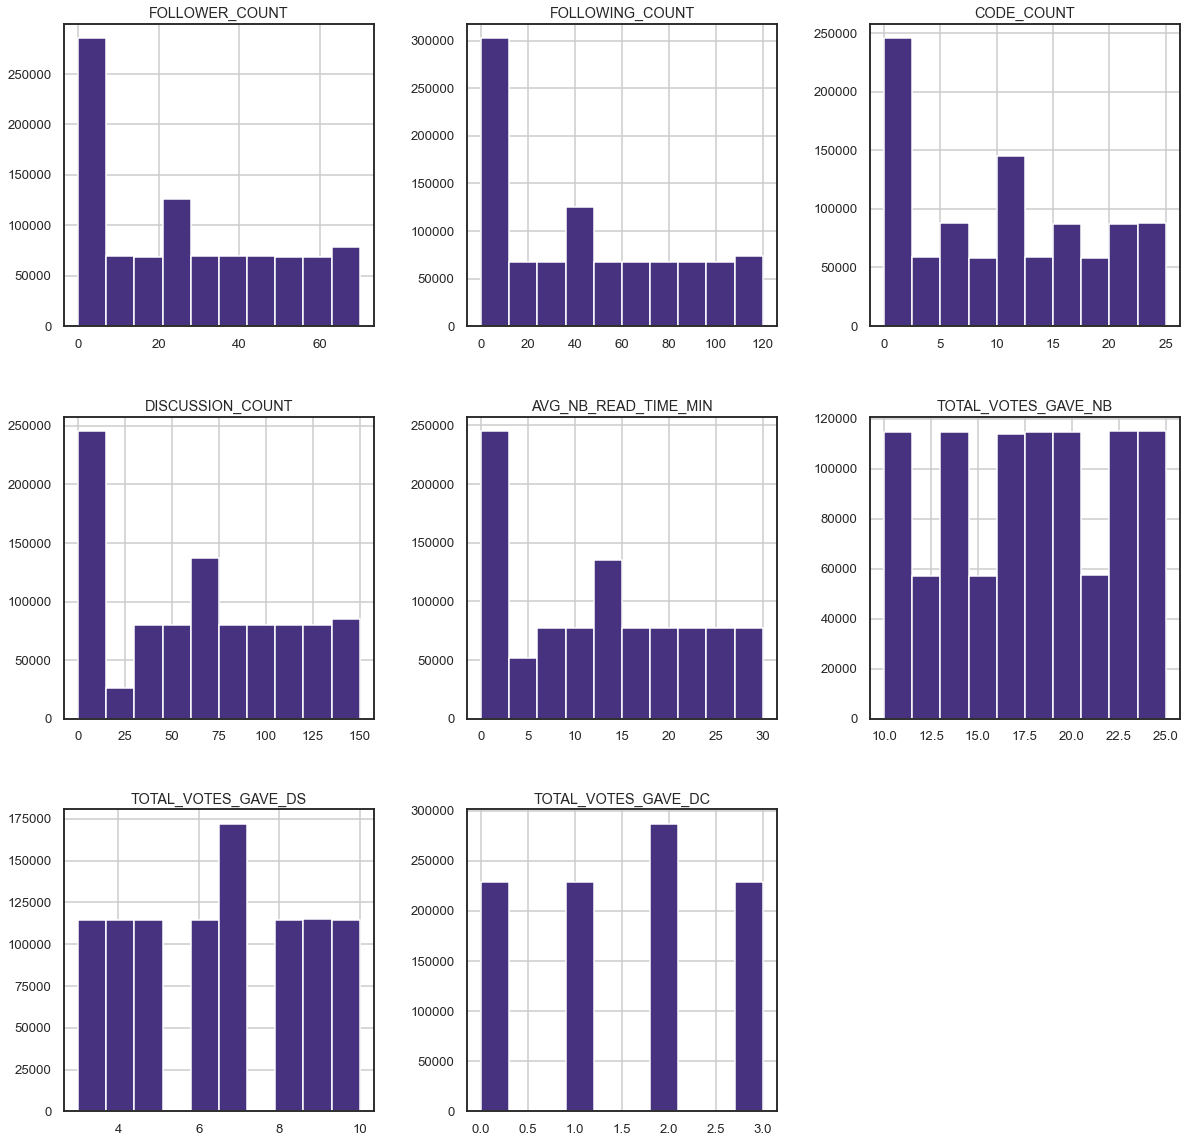

In [22]:
data.hist(figsize=(20,20))
plt.show()

from the above histogram we can analyze the three different paramaters on which the bots vary on

In [23]:
print("Percentage of fake accounts is {:.1f}% and non-fake accounts is: {:.1f}%".format(
    data[data['ISBOT'] == True].shape[0] / data.shape[0]*100,
    data[data['ISBOT'] == False].shape[0] / data.shape[0]*100))

Percentage of fake accounts is 26.8% and non-fake accounts is: 73.2%


It can be observed from the above code that the dataset is inbalanced (skewed towards non fake accounts)

In [24]:
bot = data[data['ISBOT'] == True]

In [25]:
not_bot = data[data['ISBOT'] == False]

In [26]:
# Impoting the library
from sklearn.utils import resample

In [27]:
# Dealing with imbalanced dataset.
# Random under sampling.
not_bot_downsampled = resample(not_bot,
                                   replace=False,  # sample without replacement
                                   n_samples= 260813,  # to match minority class
                                   )  # reproducible results

In [28]:
not_bot_downsampled

GENDER IS_GLOGIN  FOLLOWER_COUNT  FOLLOWING_COUNT  CODE_COUNT  \
1136756  Female      True            27.0             86.0         7.0   
856726     Male     False            62.0            114.0        10.0   
93719      Male      True            48.0              7.0        18.0   
520240     Male     False            27.0             45.0        24.0   
930668     Male     False            19.0             63.0         8.0   
...         ...       ...             ...              ...         ...   
1109671    Male      True            14.0             53.0        10.0   
829128     Male     False            61.0             92.0         7.0   
1162209  Female      True            25.0            106.0         5.0   
1055454    Male     False            35.0             38.0         8.0   
1083702    Male     False            56.0            115.0         6.0   

         DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
1136756             122.0             15.490000                 10.0   
856726               84.0              4.280000                 16.0   
93719                76.0              7.900000                 23.0   
520240               47.0              9.940000                 24.0   
930668               94.0             10.240000                 10.0   
...                   ...                   ...                  ...   
1109671              66.0             29.580000                 12.0   
829128               94.0             29.620000                 18.0   
1162209              52.0             11.300000                 11.0   
1055454             105.0             12.742246                 10.0   
1083702              66.0             20.500000                 16.0   

         TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  ISBOT  
1136756                  3.0                  1.0  False  
856726                   9.0                  0.0  False  
93719                    9.0                  1.0  False  
520240                   4.0                  1.0  False  
930668                   5.0                  1.0  False  
...                      ...                  ...    ...  
1109671                 10.0                  1.0  False  
829128                   6.0                  3.0  False  
1162209                 10.0                  2.0  False  
1055454                  8.0                  2.0  False  
1083702                  8.0                  0.0  False  

[260813 rows x 11 columns]

In [29]:
main_data = pd.concat([not_bot_downsampled, bot])

In [30]:
# Checking the balanced dataset.
main_data["ISBOT"].value_counts()

False    260813
True     260813
Name: ISBOT, dtype: int64

we are using label encoder class to convert categorical values to numeric data

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
# Performing Label Encoding on the target variable.
main_data["ISBOT"] = le.fit_transform(main_data["ISBOT"])

In [34]:
main_data

GENDER IS_GLOGIN  FOLLOWER_COUNT  FOLLOWING_COUNT  CODE_COUNT  \
1136756  Female      True            27.0             86.0         7.0   
856726     Male     False            62.0            114.0        10.0   
93719      Male      True            48.0              7.0        18.0   
520240     Male     False            27.0             45.0        24.0   
930668     Male     False            19.0             63.0         8.0   
...         ...       ...             ...              ...         ...   
1321174  Female     False             2.0              1.0         0.0   
1321176    Male     False             1.0              3.0         1.0   
1321177  Female     False             2.0              3.0         1.0   
1321179    Male     False             0.0             45.0         1.0   
1321183  Female     False             1.0              3.0         1.0   

         DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
1136756             122.0                 15.49                 10.0   
856726               84.0                  4.28                 16.0   
93719                76.0                  7.90                 23.0   
520240               47.0                  9.94                 24.0   
930668               94.0                 10.24                 10.0   
...                   ...                   ...                  ...   
1321174               7.0                  0.35                 23.0   
1321176              11.0                  1.41                 13.0   
1321177               3.0                  0.80                 23.0   
1321179               5.0                  0.35                 11.0   
1321183               9.0                  0.26                 25.0   

         TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  ISBOT  
1136756                  3.0                  1.0      0  
856726                   9.0                  0.0      0  
93719                    9.0                  1.0      0  
520240                   4.0                  1.0      0  
930668                   5.0                  1.0      0  
...                      ...                  ...    ...  
1321174                  8.0                  2.0      1  
1321176                  5.0                  2.0      1  
1321177                  9.0                  3.0      1  
1321179                  5.0                  1.0      1  
1321183                 10.0                  2.0      1  

[521626 rows x 11 columns]

Now the next stage is to do feature extraction

In [35]:
features = main_data.drop("ISBOT", axis = 1)
features

GENDER IS_GLOGIN  FOLLOWER_COUNT  FOLLOWING_COUNT  CODE_COUNT  \
1136756  Female      True            27.0             86.0         7.0   
856726     Male     False            62.0            114.0        10.0   
93719      Male      True            48.0              7.0        18.0   
520240     Male     False            27.0             45.0        24.0   
930668     Male     False            19.0             63.0         8.0   
...         ...       ...             ...              ...         ...   
1321174  Female     False             2.0              1.0         0.0   
1321176    Male     False             1.0              3.0         1.0   
1321177  Female     False             2.0              3.0         1.0   
1321179    Male     False             0.0             45.0         1.0   
1321183  Female     False             1.0              3.0         1.0   

         DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
1136756             122.0                 15.49                 10.0   
856726               84.0                  4.28                 16.0   
93719                76.0                  7.90                 23.0   
520240               47.0                  9.94                 24.0   
930668               94.0                 10.24                 10.0   
...                   ...                   ...                  ...   
1321174               7.0                  0.35                 23.0   
1321176              11.0                  1.41                 13.0   
1321177               3.0                  0.80                 23.0   
1321179               5.0                  0.35                 11.0   
1321183               9.0                  0.26                 25.0   

         TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  
1136756                  3.0                  1.0  
856726                   9.0                  0.0  
93719                    9.0                  1.0  
520240                   4.0                  1.0  
930668                   5.0                  1.0  
...                      ...                  ...  
1321174                  8.0                  2.0  
1321176                  5.0                  2.0  
1321177                  9.0                  3.0  
1321179                  5.0                  1.0  
1321183                 10.0                  2.0  

[521626 rows x 10 columns]

In [36]:
# Performing one-hot encoding on the features
features = pd.get_dummies(features)
features

FOLLOWER_COUNT  FOLLOWING_COUNT  CODE_COUNT  DISCUSSION_COUNT  \
1136756            27.0             86.0         7.0             122.0   
856726             62.0            114.0        10.0              84.0   
93719              48.0              7.0        18.0              76.0   
520240             27.0             45.0        24.0              47.0   
930668             19.0             63.0         8.0              94.0   
...                 ...              ...         ...               ...   
1321174             2.0              1.0         0.0               7.0   
1321176             1.0              3.0         1.0              11.0   
1321177             2.0              3.0         1.0               3.0   
1321179             0.0             45.0         1.0               5.0   
1321183             1.0              3.0         1.0               9.0   

         AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  TOTAL_VOTES_GAVE_DS  \
1136756                 15.49                 10.0                  3.0   
856726                   4.28                 16.0                  9.0   
93719                    7.90                 23.0                  9.0   
520240                   9.94                 24.0                  4.0   
930668                  10.24                 10.0                  5.0   
...                       ...                  ...                  ...   
1321174                  0.35                 23.0                  8.0   
1321176                  1.41                 13.0                  5.0   
1321177                  0.80                 23.0                  9.0   
1321179                  0.35                 11.0                  5.0   
1321183                  0.26                 25.0                 10.0   

         TOTAL_VOTES_GAVE_DC  GENDER_Female  GENDER_Male  IS_GLOGIN_False  \
1136756                  1.0              1            0                0   
856726                   0.0              0            1                1   
93719                    1.0              0            1                0   
520240                   1.0              0            1                1   
930668                   1.0              0            1                1   
...                      ...            ...          ...              ...   
1321174                  2.0              1            0                1   
1321176                  2.0              0            1                1   
1321177                  3.0              1            0                1   
1321179                  1.0              0            1                1   
1321183                  2.0              1            0                1   

         IS_GLOGIN_True  
1136756               1  
856726                0  
93719                 1  
520240                0  
930668                0  
...                 ...  
1321174               0  
1321176               0  
1321177               0  
1321179               0  
1321183               0  

[521626 rows x 12 columns]

now we will use the min max scaler to scale the values and get a normalized distribution

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()


In [39]:
# Normalizing the features
norm_features = scaler.fit_transform(features)

In [40]:
features = pd.DataFrame(norm_features, columns = features.columns)

In [41]:
features

FOLLOWER_COUNT  FOLLOWING_COUNT  CODE_COUNT  DISCUSSION_COUNT  \
0             0.385714         0.716667        0.28          0.813333   
1             0.885714         0.950000        0.40          0.560000   
2             0.685714         0.058333        0.72          0.506667   
3             0.385714         0.375000        0.96          0.313333   
4             0.271429         0.525000        0.32          0.626667   
...                ...              ...         ...               ...   
521621        0.028571         0.008333        0.00          0.046667   
521622        0.014286         0.025000        0.04          0.073333   
521623        0.028571         0.025000        0.04          0.020000   
521624        0.000000         0.375000        0.04          0.033333   
521625        0.014286         0.025000        0.04          0.060000   

        AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  TOTAL_VOTES_GAVE_DS  \
0                   0.516506             0.000000             0.000000   
1                   0.142714             0.400000             0.857143   
2                   0.263421             0.866667             0.857143   
3                   0.331444             0.933333             0.142857   
4                   0.341447             0.000000             0.285714   
...                      ...                  ...                  ...   
521621              0.011671             0.866667             0.714286   
521622              0.047016             0.200000             0.285714   
521623              0.026676             0.866667             0.857143   
521624              0.011671             0.066667             0.285714   
521625              0.008670             1.000000             1.000000   

        TOTAL_VOTES_GAVE_DC  GENDER_Female  GENDER_Male  IS_GLOGIN_False  \
0                  0.333333            1.0          0.0              0.0   
1                  0.000000            0.0          1.0              1.0   
2                  0.333333            0.0          1.0              0.0   
3                  0.333333            0.0          1.0              1.0   
4                  0.333333            0.0          1.0              1.0   
...                     ...            ...          ...              ...   
521621             0.666667            1.0          0.0              1.0   
521622             0.666667            0.0          1.0              1.0   
521623             1.000000            1.0          0.0              1.0   
521624             0.333333            0.0          1.0              1.0   
521625             0.666667            1.0          0.0              1.0   

        IS_GLOGIN_True  
0                  1.0  
1                  0.0  
2                  1.0  
3                  0.0  
4                  0.0  
...                ...  
521621             0.0  
521622             0.0  
521623             0.0  
521624             0.0  
521625             0.0  

[521626 rows x 12 columns]

In [42]:
target = main_data["ISBOT"]

In [43]:
target

1136756    0
856726     0
93719      0
520240     0
930668     0
          ..
1321174    1
1321176    1
1321177    1
1321179    1
1321183    1
Name: ISBOT, Length: 521626, dtype: int64

let us implement the trees classifier algorithm to try to obtain a higher accuracy

[1.41938389e-01 1.09731832e-01 1.51134196e-01 2.54689440e-01
 2.03608873e-01 3.48923294e-05 2.96672402e-05 1.98063169e-05
 4.94096798e-06 4.60893363e-06 8.40970952e-02 5.47062591e-02]


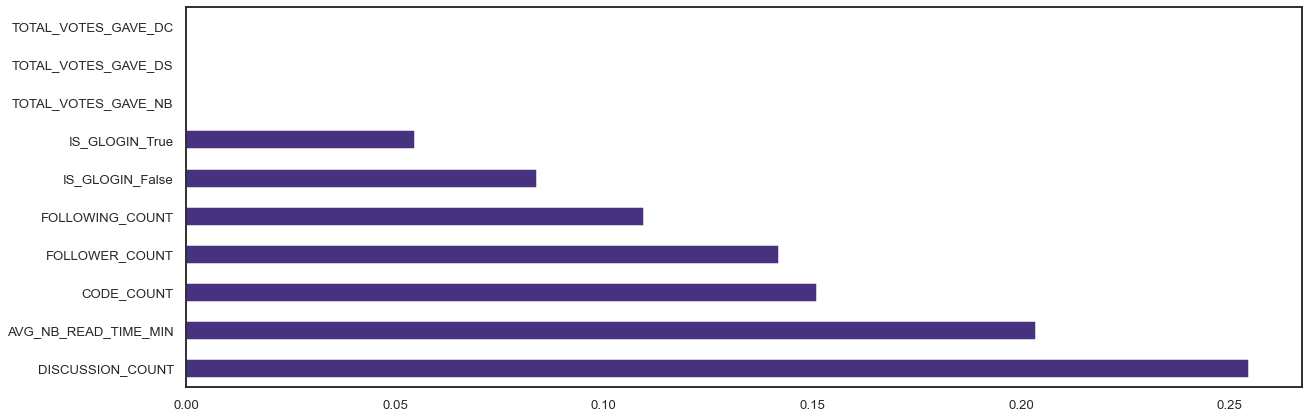

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features,target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

implementing regression,kfold and cross_val to obtain maximum accuracy

In [46]:
# define the logistic regression model
logreg_model = LogisticRegression()

# define the k-fold cross validation procedure
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform cross validation and generate predictions
target_pred = cross_val_predict(logreg_model, features, target, cv=kfold)

# generate the confusion matrix and classification report
cm = confusion_matrix(target, target_pred)
cr = classification_report(target, target_pred)
acc = accuracy_score(target, target_pred)

In [47]:
acc

0.998385816657912

we obtain an accuracy of 99.83 from cross_val

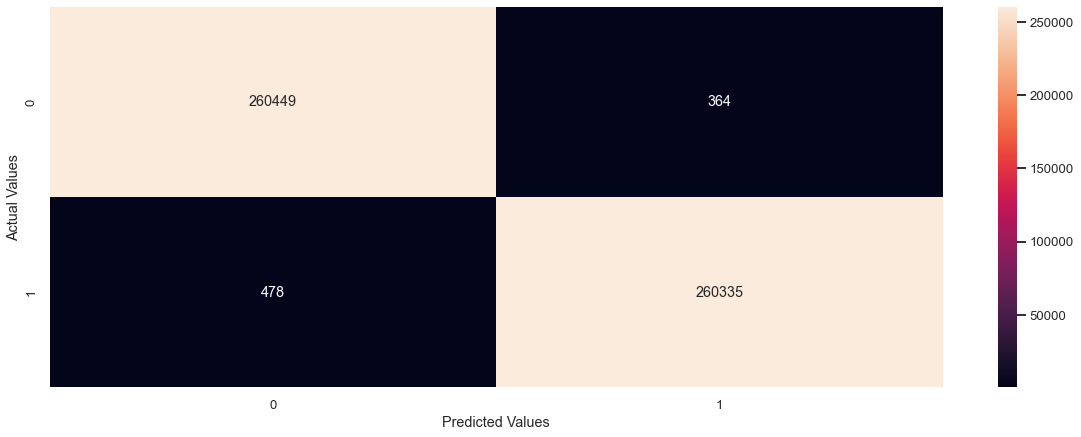

In [48]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

the above heatmap predicts a no of 260440 bots for the actual value of 260337 bots which gives a 99.87 accuracy

now let us try to improve this accuracy by using support vector machine

In [67]:
# Importing the support vector machine. 
from sklearn.svm import SVC

In [68]:
# define the SVM model
support_vector_model = SVC(kernel = 'poly')

# define the k-fold cross validation procedure
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform cross validation and generate predictions
target_pred = cross_val_predict(support_vector_model, features, target, cv=kfold)

# generate the confusion matrix and classification report
cm = confusion_matrix(target, target_pred)
cr = classification_report(target, target_pred)
acc = accuracy_score(target, target_pred)

In [69]:
acc

0.9989225997170387

the heatmap shows that for a number of actual 260813 bots the model also predicts 268013 bots with 99% accuracy

In [62]:
#Importing the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

let us implement Decision tree classifier to improve this accuracy

In [63]:
# define the logistic regression model
decision_tree_model = DecisionTreeClassifier()

# define the k-fold cross validation procedure
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform cross validation and generate predictions
target_pred = cross_val_predict(decision_tree_model, features, target, cv=kfold)

# generate the confusion matrix and classification report
cm = confusion_matrix(target, target_pred)
cr = classification_report(target, target_pred)
acc = accuracy_score(target, target_pred)

In [64]:
acc

1.0

using this model we obtain an accuracy of 1.0 which is the best case

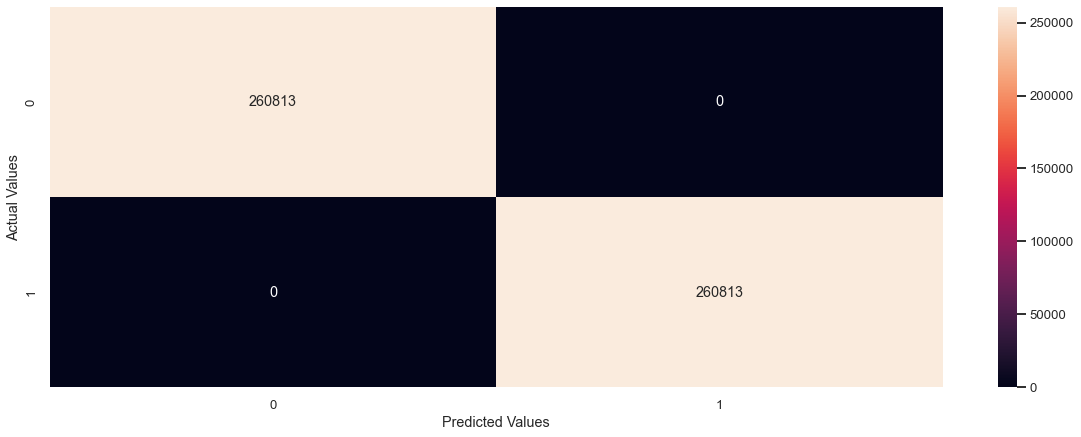

In [66]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

the heatmap shows that for a number of actual 260813 bots the model also predicts 268013 bots with 100 % accuracy


therefore we can conclude by saying that by using the above model we achieve 100% accuracy in detecting kaggle bots